#Course: Computer Networks - 1
#Project: Network Intrusion Detection            
#Name: Ajinkya Vikas Pophale


#Import all the required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset


In [ ]:
df = pd.read_csv("train_dataset.csv")

# **Basic EDA**

In [ ]:
df.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
0,4,305111,25506841,100234870,284579,1657,0,0,0,0,...,0,0,0,1,0,6,992868,992744,-1,0
1,2,209,20671,6316631,274,96,0,0,0,0,...,183877,6303353,183877,1,0,8,90551,90494,-1,3
2,4,150,19774,6475473,3054,166,0,0,0,0,...,502,6439888,502,1,0,6,7516,7418,-1,2
3,1,4699,100986365,124574097,413351,2267,0,0,0,0,...,0,0,0,1,0,8,664849,664714,-1,0
4,3,990,104058,88896,778,792,0,0,0,0,...,715,7152,715,1,0,5,4328,4201,-1,1


In [ ]:
df.shape

(4998, 32)

In [ ]:
df.describe()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
count,4998.000000,4998.000000,4.998000e+03,4.998000e+03,4998.000000,4998.000000,4998.0,4998.0,4998.0,4998.0,...,4.998000e+03,4.998000e+03,4.998000e+03,4998.0,4998.0,4998.000000,4.998000e+03,4.998000e+03,4998.0,4998.000000
mean,2.235094,83932.478191,4.721429e+07,4.743702e+07,148407.440176,1377.489996,0.0,0.0,0.0,0.0,...,2.354032e+04,5.956710e+05,2.354032e+04,1.0,0.0,54.488796,4.113947e+05,4.112736e+05,-1.0,1.157263
std,1.062464,122394.118041,4.951127e+07,4.894604e+07,149713.797741,984.424260,0.0,0.0,0.0,0.0,...,1.224342e+05,1.950752e+06,1.224342e+05,0.0,0.0,617.386958,3.889002e+05,3.888962e+05,0.0,1.448080
min,1.000000,10.000000,8.560000e+02,5.775000e+03,42.000000,26.000000,0.0,0.0,0.0,0.0,...,-6.303550e+05,0.000000e+00,-6.303550e+05,1.0,0.0,4.000000,1.050000e+02,5.000000e+01,-1.0,0.000000
25%,1.000000,836.500000,8.643970e+06,6.548716e+06,1042.250000,241.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,5.000000,6.826250e+03,6.661750e+03,-1.0,0.000000
50%,2.000000,3595.500000,2.559362e+07,2.977196e+07,134206.500000,1385.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,6.000000,5.122400e+05,5.121590e+05,-1.0,0.000000
75%,3.000000,178957.750000,7.572793e+07,7.609763e+07,287707.500000,2237.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,7.000000,6.659060e+05,6.657710e+05,-1.0,2.000000
max,4.000000,352772.000000,2.715916e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,...,1.746749e+06,1.891030e+07,1.746749e+06,1.0,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Port Number                    4998 non-null   int64
 1   Received Packets               4998 non-null   int64
 2   Received Bytes                 4998 non-null   int64
 3   Sent Bytes                     4998 non-null   int64
 4   Sent Packets                   4998 non-null   int64
 5   Port alive Duration (S)        4998 non-null   int64
 6   Packets Rx Dropped             4998 non-null   int64
 7   Packets Tx Dropped             4998 non-null   int64
 8   Packets Rx Errors              4998 non-null   int64
 9   Packets Tx Errors              4998 non-null   int64
 10  Delta Received Packets         4998 non-null   int64
 11  Delta Received Bytes           4998 non-null   int64
 12  Delta Sent Bytes               4998 non-null   int64
 13  Delta Sent Packets

Text(0.5, 1.0, 'Distribution of Target Variable - Intrusion Prediction')

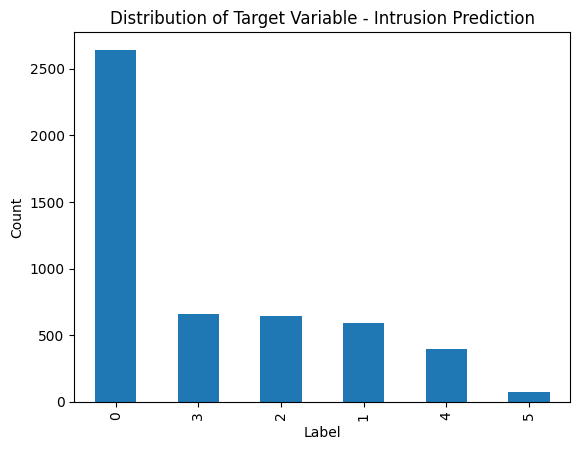

In [ ]:
df['Label'].value_counts().plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Target Variable - Intrusion Prediction")

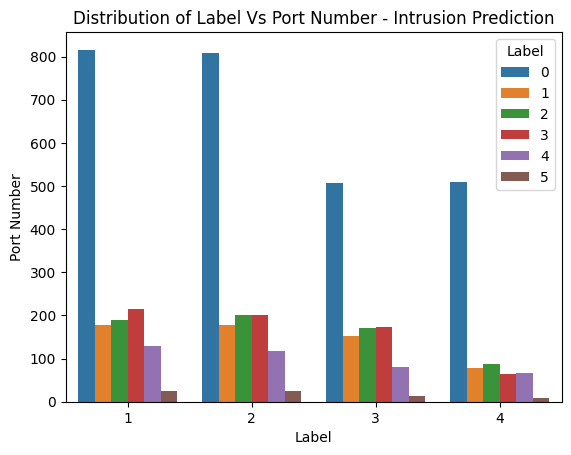

In [ ]:
sns.countplot(data=df,x='Port Number',hue='Label')
plt.xlabel("Label")
plt.ylabel("Port Number")
plt.title("Distribution of Label Vs Port Number - Intrusion Prediction")
plt.show()

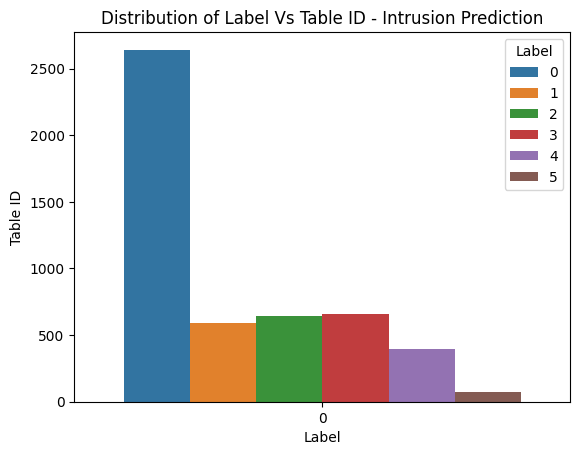

In [ ]:
sns.countplot(data=df,x='Table ID',hue='Label')
plt.xlabel("Label")
plt.ylabel("Table ID")
plt.title("Distribution of Label Vs Table ID - Intrusion Prediction")
plt.show()

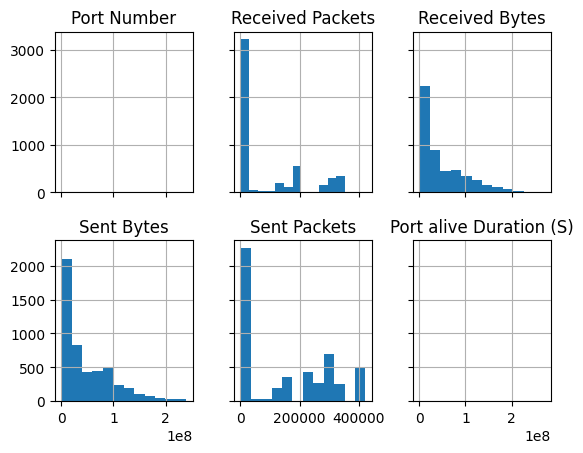

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

m=0
for i in range(2):
    for j in range(3):

        df.hist(column = df.columns[m], bins = 12, ax=ax[i,j], figsize=(20, 18))
        m+=1

# Define Independent and Dependent features

In [ ]:
X = df.drop('Label', axis = 1)
y = df['Label']

# Train and Test Split



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(3498, 31)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Model Building


### Train the model

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(X_train.shape,y_train.shape)

(3498, 31) (3498,)


# Model Prediction

In [ ]:
pred = model.predict(X_test)

## Model Evaluation


In [ ]:
print('Accuracy score',accuracy_score(pred,y_test))
print('Recall score',recall_score(pred,y_test,average='weighted'))
print('Precision score',precision_score(pred,y_test,average='weighted'))
print('F1 Score score',f1_score(pred,y_test,average='weighted'))

Accuracy score 0.8873333333333333
Recall score 0.8873333333333333
Precision score 0.9134745544943556
F1 Score score 0.8887152909782244


## Load Test data

In [ ]:
test_data = pd.read_csv('test_dataset.csv')

In [ ]:
test_data.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
0,2,1516,37852942,35609292,246092,1400,0,0,0,0,...,0,0,0,0,1,0,6,649148,649024,-1
1,3,182335,191155854,232913950,292956,2927,0,0,0,0,...,6305279,179,6305279,179,1,0,8,674941,674804,-1
2,1,180594,58085529,12697283,300026,1750,0,0,0,0,...,0,0,0,0,1,0,6,957699,957567,-1
3,2,280,6317648,14403,109,111,0,0,0,0,...,0,0,0,0,1,0,6,52073,51982,-1
4,3,173724,32530097,19003413,151576,935,0,0,0,0,...,0,0,0,0,1,0,4,643392,643276,-1


In [ ]:
# How to Import the DecisionTreeClassifer Class
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
print('Accuracy score for model 1',accuracy_score(pred1,y_test))
print('Recall score for model 1',recall_score(pred1,y_test,average='weighted'))
print('Precision score for model 1',precision_score(pred1,y_test,average='weighted'))
print('F1 Score score for model 1',f1_score(pred1,y_test,average='weighted'))




Accuracy score for model 1 0.9226666666666666
Recall score for model 1 0.9226666666666666
Precision score for model 1 0.9270373464131033
F1 Score score for model 1 0.9245346066375659


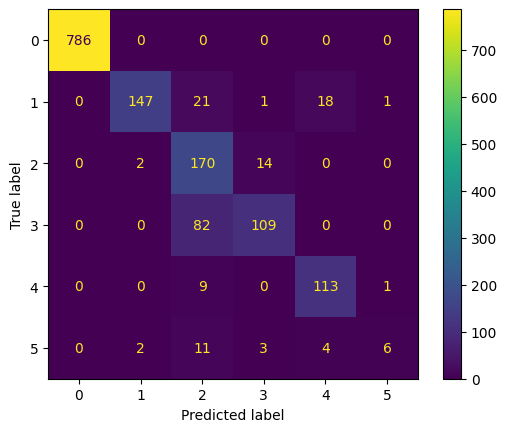

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

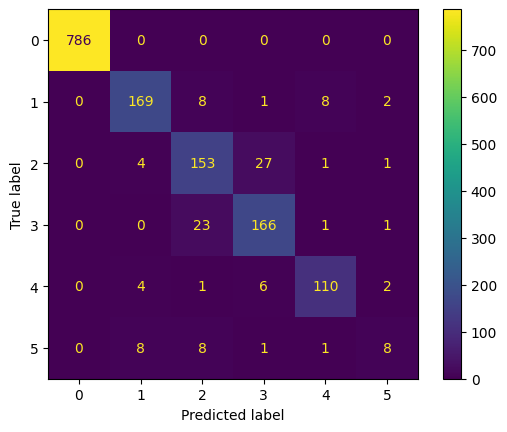

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model1.classes_)
disp.plot()
plt.show()

## Test Data Prediction

In [ ]:
test_pred = model.predict(test_data)
test_results = pd.DataFrame(test_pred)
test_results.columns = ["Label"]
test_results.to_csv("submission.csv", index = False)
# files.download('submission.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
